# Data Visualization with Matplolib

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits. Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.

This notebook illustrates some plotting examples for data analysis projects.

## Simple plot
Lets generate a simple sine wave first, back to my Electrical Engg. classes

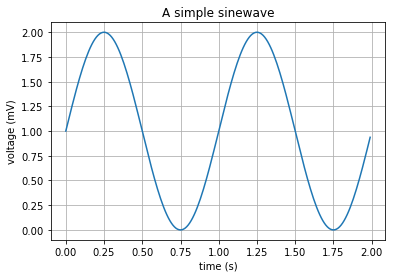

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#Generate a range of values for t(x-axis) and s(y-axis)
t = np.arange(0.0, 2.0, 0.01) 
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)
# Set x and y labels, titles, grid and also save figure as test.png
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('A simple sinewave')
plt.grid(True)
plt.savefig("test.png")
plt.show()


## Subplots

Multiple axes (i.e. subplots) are created with the subplot() command:

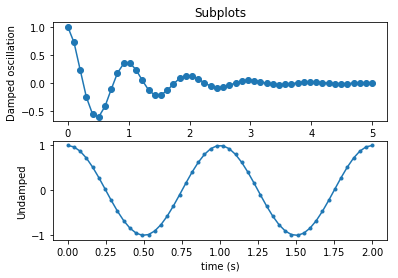

In [5]:
#define two sets of x and y variables
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## Histograms
Histograms are plotted using the hist( ) command

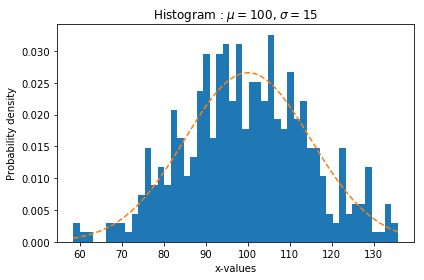

In [14]:
import matplotlib.mlab as mlab

np.random.seed(0)

# generate some sample data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('x-values')
ax.set_ylabel('Probability density')
ax.set_title('Histogram : $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Bar Chart
Bar charts are simple to create using the bar() command, which includes many customizations.

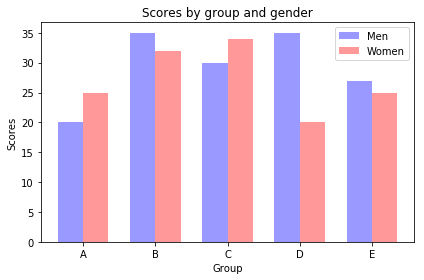

In [16]:
# To create a bar chart
n_groups = 5

means_men = (20, 35, 30, 35, 27)
means_women = (25, 32, 34, 20, 25)


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E')) #list 1 defines the x-axis marks and list 2 names them
plt.legend()

plt.tight_layout()
plt.show()


Here's how we obtain a stacked bar chart of the same data; i.e a single stacked bar instead of two bars side-by-side

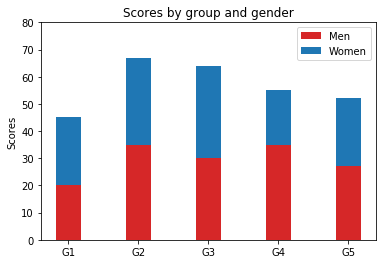

In [18]:
#Stacked bar plot
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='#d62728')
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

## Pie charts

The pie() command allows you to easily create pie charts. Optional features include auto-labeling the percentage of area, exploding one or more wedges from the center of the pie, and a shadow effect. Take a close look at the below code, which generates this figure in just a few lines of code.

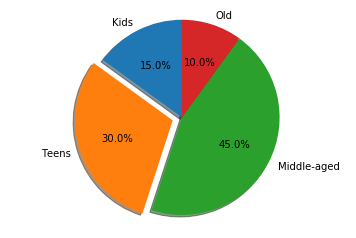

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Kids', 'Teens', 'Middle-aged', 'Old'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Box plots

This section illustrates how to create a box plot(rectangular), and how to fill them with customcolors by accessing the properties of the artists of the box plot. Additionally, the ``labels`` parameter is used to provide x-tick labels for each sample.

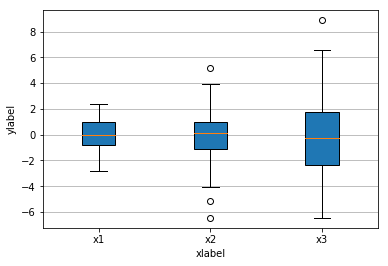

In [26]:
# Random test data
np.random.seed(123)
all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]

fig, axes = plt.subplots()

# rectangular box plot
bplot1 = axes.boxplot(all_data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

        
# adding horizontal grid lines
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(all_data))], )
axes.set_xlabel('xlabel')
axes.set_ylabel('ylabel')
    
# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])

plt.show()

## Axes Grid plot

Lets see how to create a simple grid of four plots with colours of varying intensity to represent the variations

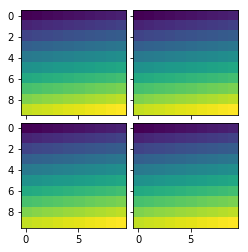

In [34]:
from mpl_toolkits.axes_grid1 import ImageGrid
im = np.arange(100)
im.shape = 10, 10

fig = plt.figure(1, (4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(4):
    grid[i].imshow(im)  # The AxesGrid object work as a list of axes.

plt.show()